### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[260110筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/260110%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdateStockDatabase()

2026-02-03 21:43:11.690 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
新增股票代碼。代碼 ＝ 009816：股票名稱 ＝ 凱基台灣TOP50，產業類別 ＝ ETF，類型 ＝ twse
新增股票代碼。代碼 ＝ 00993A：股票名稱 ＝ 主動安聯台灣，產業類別 ＝ ETF，類型 ＝ twse
修改股票資訊。代碼 ＝ 1471：股票名稱 ＝ 首利，產業類別 ＝ 電子零組件業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1598：股票名稱 ＝ 岱宇，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1704：股票名稱 ＝ 榮化，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1710：股票名稱 ＝ 東聯，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1713：股票名稱 ＝ 國化，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1724：股票名稱 ＝ 台硝，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1730：股票名稱 ＝ 花仙子，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1733：股票名稱 ＝ 五鼎，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1762：股票名稱 ＝ 中化生，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1783：股票名稱 ＝ 和康生，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2303：股票名稱 ＝ 聯電，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2308：股票名稱 ＝ 台達電，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2315：股票名稱 ＝ 神達，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2321：股票名稱 ＝ 東訊，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2323：股票名稱 ＝ 中環，產業類別 ＝ 光電業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2331：股票名稱 ＝ 精英，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代碼 

2026-02-03 21:43:12.308 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-03 21:43:15.871 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-03 21:43:19.439 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-26
【略過】週Ｋ：2026-01-26


2026-02-03 21:43:26.139 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-27


2026-02-03 21:43:31.540 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-28


2026-02-03 21:43:37.110 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-29


2026-02-03 21:43:42.540 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-01-30


2026-02-03 21:43:47.984 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-03 21:43:51.584 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2026-02-03 21:43:55.188 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2026-02-02


2026-02-03 21:44:00.729 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2026-02-03


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **盤前**：[盤前觀點](https://www.facebook.com/kevinyang20180801/posts/pfbid032KpzTGpSUBY9ZV3aNSBiRdWYs5pxwt28mNJdhyd53iPT3E8JZZgvgqZKw3nZD3fvl?rdid=LYOBT8XlEBZbI8Re#)  
> 夜盤期指反彈 625 點，盤勢偏多看待。  
> 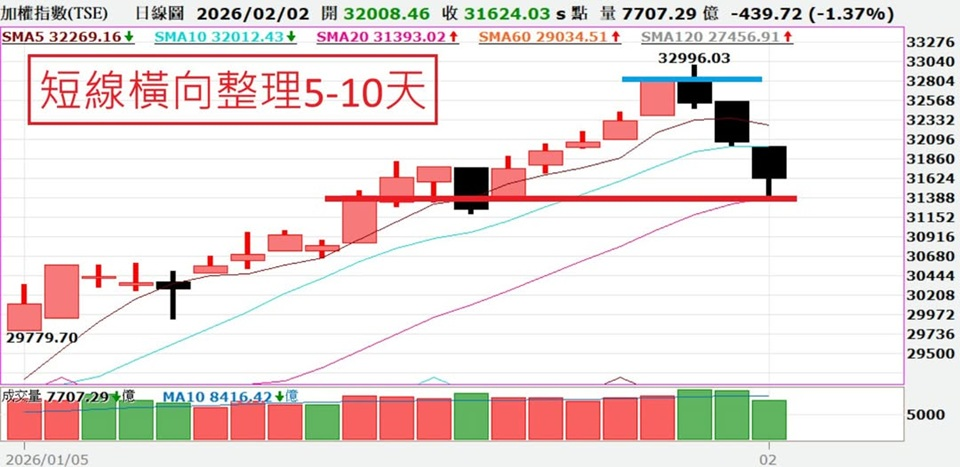  

In [5]:
# 壓力線與支撐線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2026-01-27'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2026-01-28']['Close']
    
    # 支撐線
    support_line_start_date = '2026-01-15'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2026-01-19']['Open']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5,2.5]
    
    colors=['xkcd:electric blue','xkcd:red','xkcd:red']

    return seq_of_seq_of_points,linewidths,colors

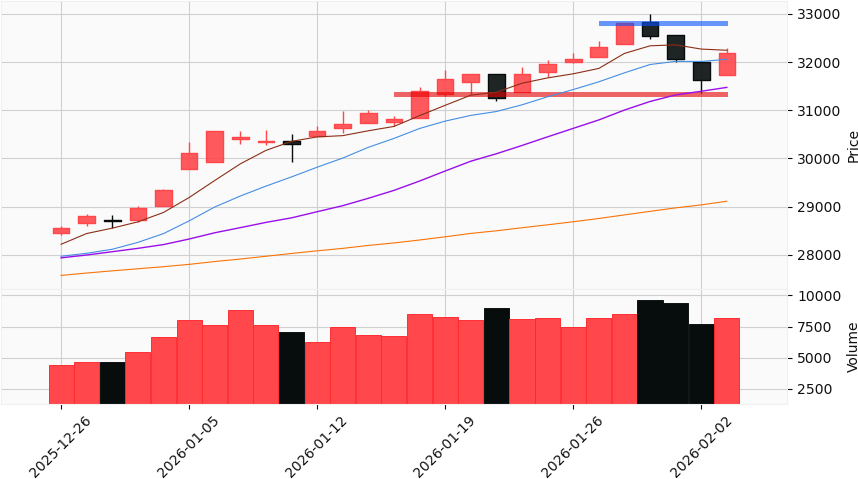

In [6]:
# 收盤：壓力線與支撐線
image = mysys.DrawOnKlineChart('TAIEX','2025-12-26','2026-02-03',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


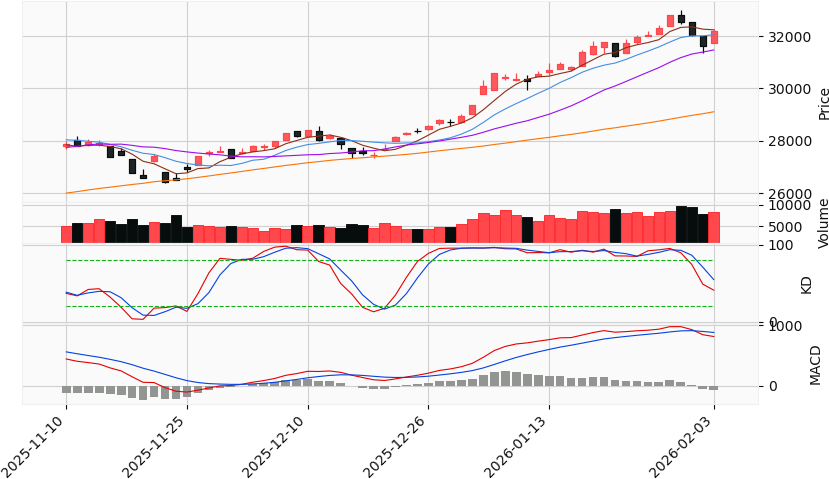

技術分析工具,解盤內容
Ｋ線／Ｋ棒,（未識別出Ｋ線型態）
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 8215.74億元 ，十日均量 ＝ 8445.17億元）
型態,反轉型態之上升楔形，型態範圍由2025-04-09開始到2026-02-02結束。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-29死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-19當週死亡交叉。並且2026-01-26該週在超買區。
整體評價,"價格趨勢 短線呈下跌後反彈：近幾日自高檔回檔至約 31,624點後，今日收回 32,195點，但仍未站回短期均線上方。中期均線仍上揚且價格仍在中期均線之上，顯示中期多頭結構未被破壞，但短線轉為震盪偏弱。 價量關係 回檔過程中成交量由高檔放量轉為相對收斂，今日反彈量能約 8,216億元，較前一交易日回升但未明顯放大。整體屬「回檔量縮、反彈量未有效放大」，短線買盤追價力道仍偏保守。 支撐與壓力 支撐先看 32,000點整數關卡與近低 31,360點（跌破則短線轉弱加劇）。壓力先看 32,245點附近（短期均線區）與 32,800～33,000點（前高帶），需帶量站回才有利續攻。 KD指標解讀 K、D同步下彎且K值落在D值之下，顯示短線動能仍在降溫。指標已自高檔區明顯回落、尚未進入超賣區，代表短線仍有震盪整理空間。 MACD指標解讀 DIF仍在MACD線之上但兩者皆走平轉下，且柱狀體由正轉負並擴大，顯示多方動能明顯衰退、短線偏弱。若柱狀體負值持續放大，代表回檔壓力仍在；反之需先見到負值收斂才較利止跌。 綜合評價 中期趨勢仍偏多，但短線屬高檔回檔後的反彈，且動能指標偏弱，操作上宜以守支撐、等量能確認為主。後續若能帶量站回 32,245點並突破 32,800～33,000點，才較有機會重啟上攻；若跌破 31,360點，則需提高風險控管與停損紀律。"


In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **盤後**：量化技術分析  

解盤內容：


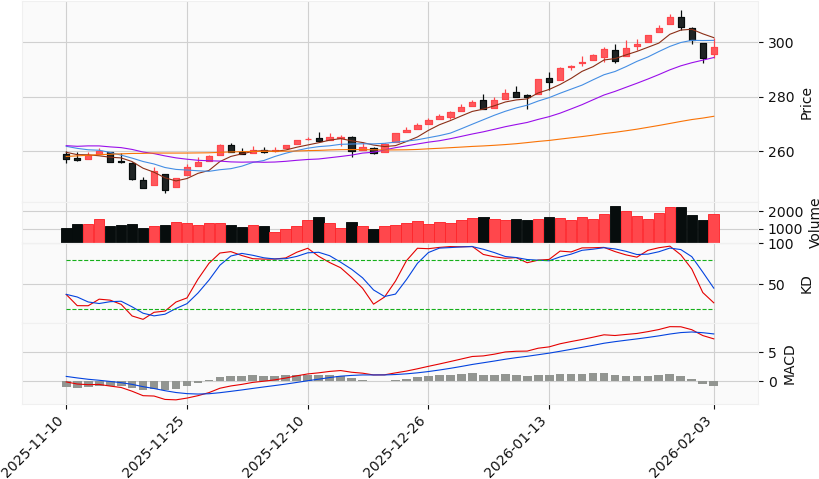

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2026-02-03
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 1822.95億元 ，十日均量 ＝ 1900.18億元）
型態,反轉型態之頭肩底，型態範圍由2024-11-12開始到2025-12-23結束，估算目標價為346.86點。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-29死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週死亡交叉。並且2026-01-26該週在超買區。
整體評價,價格趨勢 短線呈下跌／回檔：近五日收盤由 309.28 點一路回落至 294.32 點後，今日反彈收在 298.26 點。價格已跌破 5 日、10 日線，顯示短期轉弱，但仍守在 20 日線附近，中期結構尚未完全破壞。 價量關係 回檔過程中成交量由約 2236.89 億元降至 1480.14 億元，屬縮量下跌，賣壓有降溫跡象。今日反彈量回升至約 1822.95 億元，但仍未回到前高量能，偏向跌深後的技術性反彈。 支撐與壓力 支撐先看 294.34 點（20 日線附近）與 292.44 點（近低點），若失守則回測 272.84 點（60 日線）機率上升。壓力先看 300.63～301.62 點（10 日／5 日線區）與 305.48 點（前一交易日收盤附近），再上方為 309.28～311.68 點（近期高檔區）。 KD 指標解讀 K 值與 D 值同步下彎，且目前落在 20～30 的低檔區，屬接近超賣但尚未明確翻揚。短線雖有反彈空間，但在 KD 未出現明顯回升前，仍以弱勢反彈視之。 MACD 指標解讀 DIF 仍在 0 軸上方但持續走低，且已落到 MACD 線下方，顯示動能轉弱。柱狀體由正轉負且負值擴大，代表下行動能仍在釋放，短線不利追價。 綜合評價 目前屬中期偏多、短線回檔轉弱的型態，反彈需先站回 300.63～301.62 點並帶量，才有利修復短期趨勢。若跌破 292.44 點，回檔恐擴大，操作上宜以支撐帶的守穩與否作為停損／停利依據。


In [8]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股篩選  

* 選股程序    

In [9]:
results = analysis.screener()

In [10]:
for stock_info in results :
    print('股票代碼 ＝ {} ， 股票名稱 ＝ {} '.format(stock_info[0],stock_info[1]))

* 篩選結果  
  - 美食-KY(2723)：穩健續漲  
    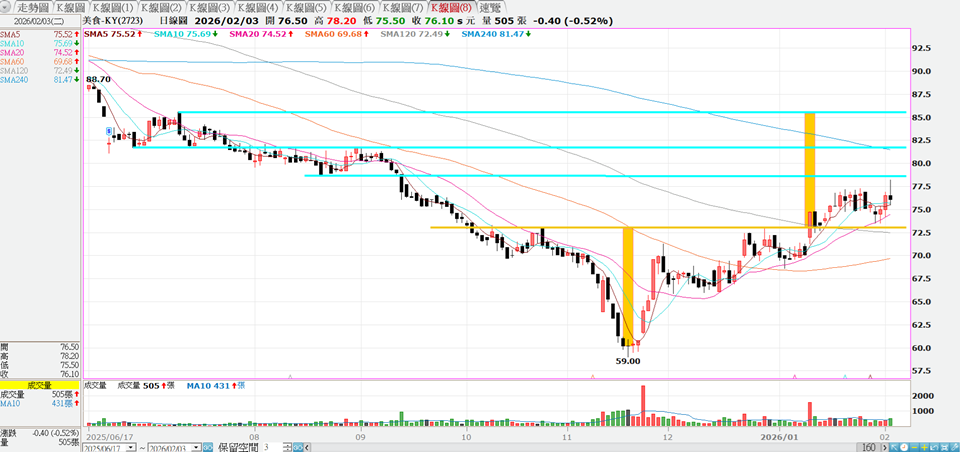  
  - 易華電(6552)： 已到壓力區  
    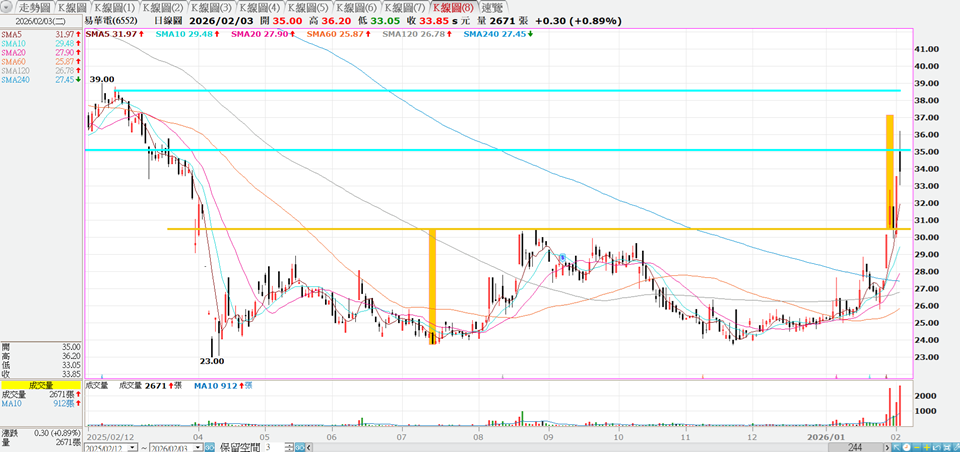  
  - 光鋐(4956)：技術突破  
    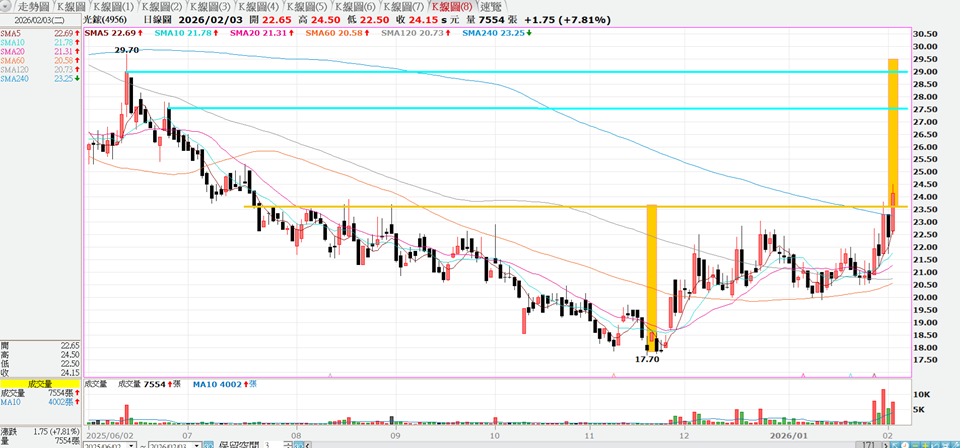  
  - 豐藝(6189)：技術突破  
    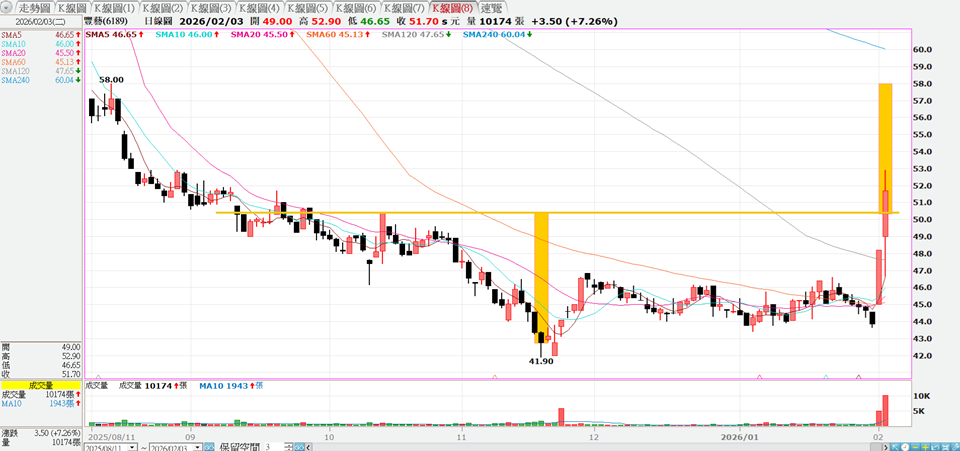  

* 觀察股列表  
  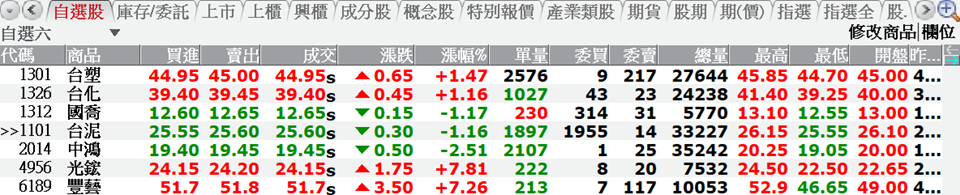  

### 個股解盤  

* 台泥(1101)  
  看法：短線轉弱，但仍於前波壓力與頸線間盤整。    

> **盤後**：量化技術分析  

解盤內容：


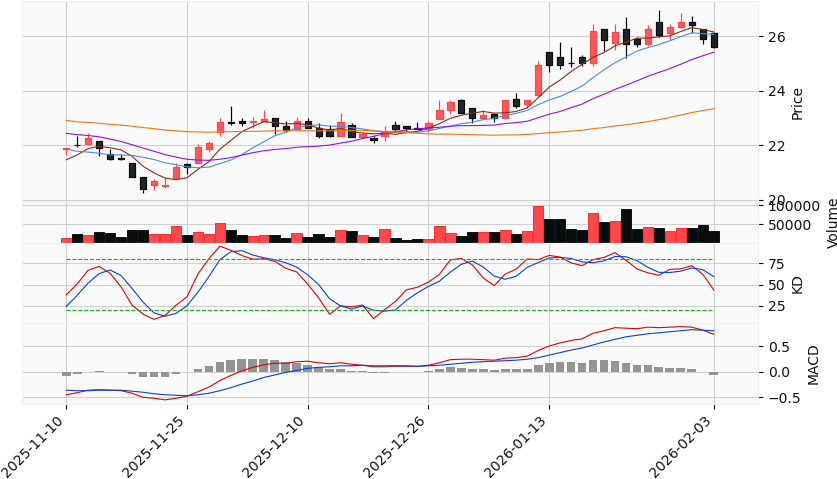

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-30 孕育線／懷抱線 : 2026-01-28
Ｋ線圖,中期為高位階 長期為中位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 33362張 ，十日均量 ＝ 46741張）
型態,底型反轉之底部型態，型態範圍由2025-06-20開始到2026-01-12結束，估算目標價為27.09元。
移動平均線,5日線下彎、10日線下彎，短期翻空；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2026-02-02死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-17當週黃金交叉。並且2026-01-26該週在超買區。
整體評價,價格趨勢 目前屬於上漲後回檔格局，近兩日連續收黑，收盤已落在5日線與10日線下方，短線轉弱。中期均線仍維持上揚，顯示中期多方結構尚未被破壞，但短線進入整理偏弱階段。 價量關係 回檔段出現量增下跌（2/2放量收黑），顯示上檔賣壓加重、短線資金有撤退跡象。2/3量能縮回但續跌，屬於下跌延續中的量縮，代表追價意願不足、反彈動能仍偏弱。 支撐與壓力 支撐先看 25.55元（近期低點），若失守則看 25.40元附近（20日線一帶）。壓力先看 26.06–26.15元（10日線與5日線區間），再看 26.25元（近一日高點/反彈關卡），上方較大壓力在 26.75–26.85元（前高區）。 KD指標解讀 K值明顯下彎並跌破D值，且兩線同步走低，屬於短線轉弱的修正訊號。目前尚未進入超賣區（<20），表示仍有續跌或反覆震盪的空間，需等待止跌訊號再看回穩。 MACD指標解讀 DIF仍在MACD線之上但持續下滑，兩線距離快速收斂，代表多方動能明顯降溫。柱狀體由正轉負且負值擴大，顯示短線下行動能正在增強，回檔尚未結束的機率偏高。 綜合評價 整體為中期偏多、短線轉弱回檔：若能守住 25.55元/25.40元並出現量縮止跌，才有機會回到反彈節奏。短線操作宜先以 26.06–26.15元作為轉強觀察門檻，未站回前偏保守，並留意跌破支撐時的停損紀律。


In [11]:
stock_analysis(analysis,'1101')

> **盤後**：底部反轉交易策略分析  

In [12]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-07-04'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-07-30']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-19'
    bottom_price = range_prices.loc['2025-11-19']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-19'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為29.30元


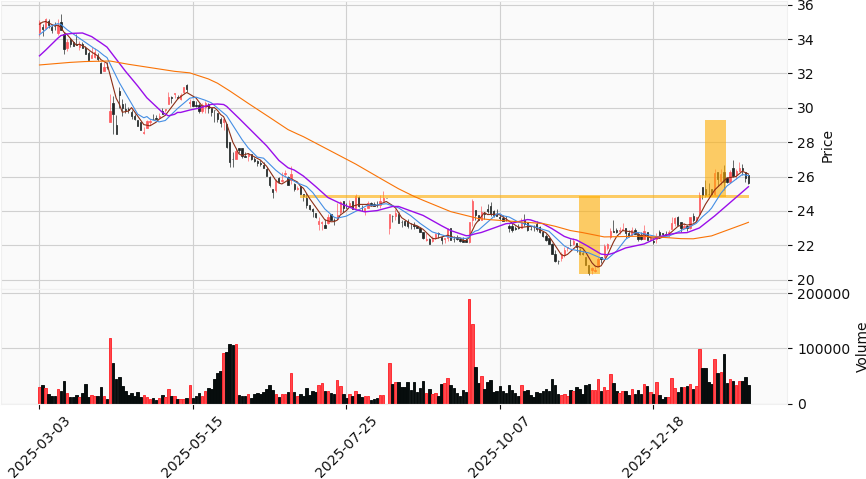

In [13]:
image = mysys.DrawOnKlineChart('1101','2025-03-03','2026-02-03',line_drawing_callback)
display(image)

籌碼面：  
法人大賣(-14172)：外資大賣(-13294)、投信中立(-5)、自營大賣(-873)。  
主力小買(+822)。  
分公司買賣家數差分散(-66)。  
融資中立(+25)、融券增(+16)。  

* 台塑(1301)  
  看法：反彈站回頸線支撐。  

> **盤後**：量化技術分析  

解盤內容：


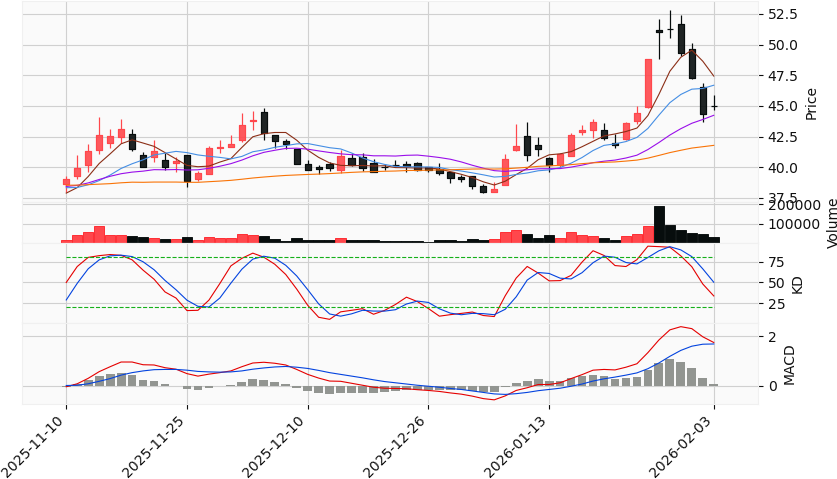

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2026-01-28 , 2026-02-03 十字線 : 2026-01-28 , 2026-02-03 吞噬 : 2026-01-29 孕育線／懷抱線 : 2026-02-03"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 27805張 ，十日均量 ＝ 66469張）
型態,反轉型態之雙重頂，型態範圍由2025-11-10開始到2026-01-02結束，估算目標價為33.95元。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-28死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週黃金交叉。
整體評價,價格趨勢 目前屬下跌（回檔）格局，近五日由高檔一路走低後，最新一日雖收紅但仍在前一波下跌結構中。短期均線（5日、10日）已轉為下彎，價格位於5日、10日線下方，偏弱整理。 價量關係 下跌過程中成交量呈遞減，顯示追殺力道有降溫，但也代表承接動能不足。最新一日量能明顯縮小、收紅偏反彈性質，尚未看到放量止跌訊號。 支撐與壓力 支撐先看 44.7元～44.3元（近低點區與收盤附近），跌破則轉看 43.7元（近期波段低點）。壓力先看 46.7元～47.4元（10日線與5日線附近），再上方為 49.3元～50.1元（前一段下跌的反彈高點區）。 KD指標解讀 K值與D值同步下行，且K值落在D值下方，短線動能仍偏弱。指標已由高檔明顯回落、接近低檔區但尚未到超賣，偏向續弱後觀察是否止跌。 MACD指標解讀 DIF仍在MACD線之上，但DIF持續下彎並貼近MACD線，代表上行動能快速衰退。柱狀體明顯縮短接近零軸，顯示多方動能幾乎耗盡，短線偏向整理轉弱。 綜合評價 整體為高檔回檔後的弱勢反彈，目前較像跌深量縮的技術性回穩，尚未形成明確轉強結構。若能站回 46.7元 之上並伴隨量能回升，才有機會扭轉短線弱勢；反之跌破 44.3元，回檔延伸風險將提高。


In [14]:
stock_analysis(analysis,'1301')

> **盤後**：底部反轉交易策略分析  

In [15]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-09-10'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-04']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-01-09'
    bottom_price = range_prices.loc['2025-01-09']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-26'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為57.00元


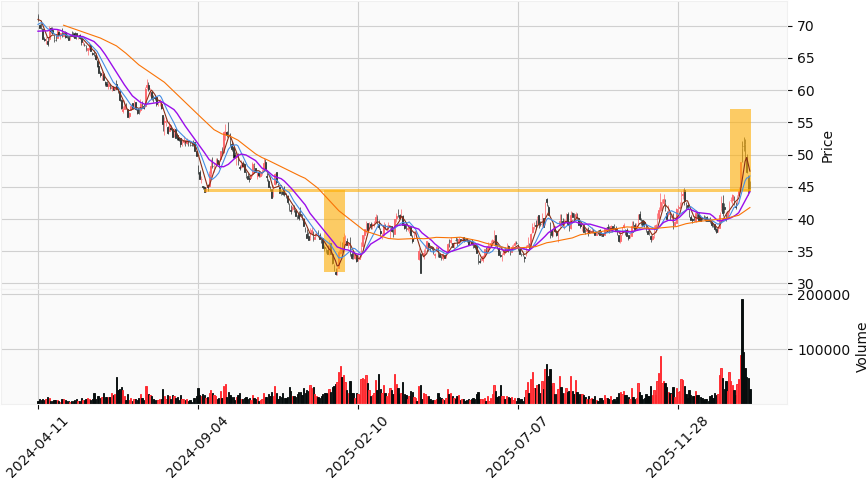

In [16]:
image = mysys.DrawOnKlineChart('1301','2024-04-11','2026-02-03',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-2534)：外資小賣(-2454)、投信中立(-6)、自營小賣(-74)。  
主力小賣(-2929)。  
分公司買賣家數差分散(-22)。  
融資大減(-1588)、融券減(-30)。  

* 台化(1326)  
  看法：短線偏弱，連跌三日後反彈。  

> **盤後**：量化技術分析  

解盤內容：


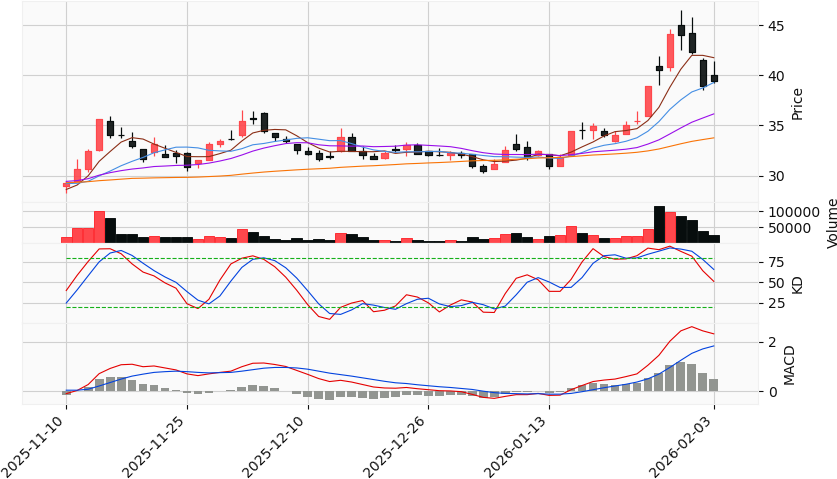

技術分析工具,解盤內容
Ｋ線／Ｋ棒,紡錘線 : 2026-01-29 孕育線／懷抱線 : 2026-02-03
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：成交量小於十日均量（成交量 ＝ 24364張 ，十日均量 ＝ 53833張）
型態,盤整型態之矩形，型態範圍由2025-08-22開始到2025-11-12結束。
移動平均線,5日線下彎、10日線上揚，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2026-01-29死亡交叉。
ＭＡＣＤ指標,MACD雙線在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2026-01-12當週黃金交叉。
整體評價,價格趨勢 短線呈下跌（回檔）：近期自高點約 46.5元 快速拉回，收盤落在 39.4元。目前價格已跌破 5日線約41.76元，但仍守在 10日線約39.28元 附近，屬強勢上漲後的回檔結構。 價量關係 回檔過程中成交量由高檔明顯縮減（近期量能逐日降低），顯示追價動能降溫、賣壓有收斂跡象。先前放量急漲後轉為量縮回檔，短線偏向整理消化而非再度強攻。 支撐與壓力 支撐先看 39.3元～39.4元（10日線與現價附近），跌破則看前低區 38.5元。壓力先看 41.8元（5日線附近），再上方為 44.0元～44.6元（近期反彈與大量區），更上緣為 46.5元 前高。 KD指標解讀 KD自高檔區明顯下彎，K值已回落至約 51、D值約 66，顯示短線動能轉弱、進入回檔修正。尚未落入超賣區（<20），因此仍有續跌或震盪整理的空間。 MACD指標解讀 DIF仍在MACD線之上，但DIF已轉為下滑，且柱狀體（OSC）持續縮短，代表上漲動能正在減弱。整體仍偏多架構下的動能降溫，短線以整理與回檔為主。 綜合評價 目前屬「多頭趨勢中的短線回檔」，關鍵在 39.3元～38.5元 支撐帶能否守穩以維持強勢整理。若能量縮止跌並站回 41.8元，較有利回補跌幅；反之跌破 38.5元，回檔恐擴大、整理時間拉長。


In [17]:
stock_analysis(analysis,'1326')

> **盤後**：底部反轉交易策略分析  

In [18]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2024-11-11'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-12-04']['Open']

    # 設定底部日期與價格
    bottom_date  = '2025-06-23'
    bottom_price = range_prices.loc['2025-06-23']['Close']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2026-01-26'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']
    
    return seq_of_seq_of_points,linewidths,colors

估算目標價為50.10元


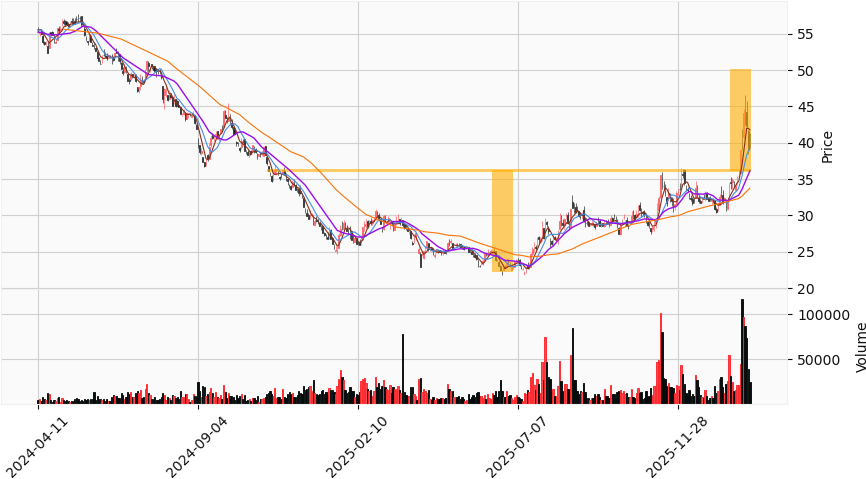

In [19]:
image = mysys.DrawOnKlineChart('1326','2024-04-11','2026-02-03',line_drawing_callback)
display(image)

籌碼面：  
法人小賣(-467)：外資小賣(-948)、投信中立(0)、自營大買(+481)。  
主力小賣(-999)。  
分公司買賣家數差分散(-44)。  
融資大減(-651)、融券減(-14)。  